# 📝 Exercise M6.05

The aim of the exercise is to get familiar with the histogram
gradient-boosting in scikit-learn. Besides, we will use this model within
a cross-validation framework in order to inspect internal parameters found
via grid-search.

We will use the California housing dataset.

In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

First, create a histogram gradient boosting regressor. You can set the
trees number to be large, and configure the model to use early-stopping.

In [2]:
# Write your code here.

In [3]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [6]:
model = HistGradientBoostingRegressor?

In [7]:
model = HistGradientBoostingRegressor(max_iter=1000, n_iter_no_change=5)

We will use a grid-search to find some optimal parameter for this model.
In this grid-search, you should search for the following parameters:

* `max_depth: [3, 8]`;
* `max_leaf_nodes: [15, 31]`;
* `learning_rate: [0.1, 1]`.

Feel free to explore the space with additional values. Create the
grid-search providing the previous gradient boosting instance as the model.

In [10]:
# Write your code here.
from sklearn.model_selection import GridSearchCV
param_grid ={
    'max_depth': [3, 8],
    'max_leaf_nodes': [15, 31],
    'learning_rate': [0.1, 1]
}

In [11]:
gsearch = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=10)

In [13]:
gsearch.fit(data, target)

GridSearchCV(cv=5,
             estimator=HistGradientBoostingRegressor(max_iter=1000,
                                                     n_iter_no_change=5),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [3, 8],
                         'max_leaf_nodes': [15, 31]})

In [16]:
gsearch.score(data, target)

0.8682855807993711

In [18]:
import pandas as pd

In [25]:
cv_res = pd.DataFrame(gsearch.cv_results_).sort_values('rank_test_score')

In [26]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.517155,0.050296,0.024872,0.002998,0.1,8,15,"{'learning_rate': 0.1, 'max_depth': 8, 'max_le...",0.666632,0.711720,0.742450,0.696222,0.665807,0.696566,0.028904,1
1,0.462722,0.060256,0.029524,0.003953,0.1,3,31,"{'learning_rate': 0.1, 'max_depth': 3, 'max_le...",0.681113,0.693041,0.745766,0.661814,0.684698,0.693286,0.028166,2
0,0.385242,0.133288,0.024220,0.008311,0.1,3,15,"{'learning_rate': 0.1, 'max_depth': 3, 'max_le...",0.660697,0.703999,0.741798,0.680985,0.672856,0.692067,0.028606,3
3,0.682925,0.065915,0.024300,0.002644,0.1,8,31,"{'learning_rate': 0.1, 'max_depth': 8, 'max_le...",0.633555,0.718835,0.740755,0.683892,0.676432,0.690694,0.036912,4
6,0.072822,0.004489,0.003520,0.000198,1,8,15,"{'learning_rate': 1, 'max_depth': 8, 'max_leaf...",0.615504,0.599339,0.705292,0.611391,0.580748,0.622455,0.043143,5
5,0.087046,0.014766,0.005734,0.001163,1,3,31,"{'learning_rate': 1, 'max_depth': 3, 'max_leaf...",0.610597,0.649847,0.668758,0.554809,0.569679,0.610738,0.044068,6
4,0.078123,0.010195,0.005006,0.000714,1,3,15,"{'learning_rate': 1, 'max_depth': 3, 'max_leaf...",0.534480,0.637910,0.668022,0.485850,0.613448,0.587942,0.067589,7
7,0.084296,0.008677,0.003322,0.000306,1,8,31,"{'learning_rate': 1, 'max_depth': 8, 'max_leaf...",0.380917,0.569978,0.680388,0.400270,0.592570,0.524825,0.115803,8


Finally, we will run our experiment through cross-validation. In this regard,
define a 5-fold cross-validation. Besides, be sure to shuffle the data.
Subsequently, use the function `sklearn.model_selection.cross_validate`
to run the cross-validation. You should also set `return_estimator=True`,
so that we can investigate the inner model trained via cross-validation.

In [60]:
# Write your code here.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=0)

In [74]:
cv_res = cross_validate(gsearch, data, \
                        target,return_estimator=True, cv=cv)

In [75]:
cv_res

{'fit_time': array([2.51850247, 2.17695618, 2.13500023, 1.82906008, 1.98635793]),
 'score_time': array([0.0190506 , 0.03619504, 0.02148032, 0.02942729, 0.04241443]),
 'estimator': [GridSearchCV(cv=5,
               estimator=HistGradientBoostingRegressor(max_iter=1000,
                                                       n_iter_no_change=5),
               n_jobs=10,
               param_grid={'learning_rate': [0.1, 1], 'max_depth': [3, 8],
                           'max_leaf_nodes': [15, 31]}),
  GridSearchCV(cv=5,
               estimator=HistGradientBoostingRegressor(max_iter=1000,
                                                       n_iter_no_change=5),
               n_jobs=10,
               param_grid={'learning_rate': [0.1, 1], 'max_depth': [3, 8],
                           'max_leaf_nodes': [15, 31]}),
  GridSearchCV(cv=5,
               estimator=HistGradientBoostingRegressor(max_iter=1000,
                                                       n_iter_no_change=5),
    

In [76]:
cv_res['test_score'].mean(),cv_res['test_score'].std()

(0.8326787987978435, 0.006736435865890899)

Now that we got the cross-validation results, print out the mean and
standard deviation score.

In [77]:
# Write your code here.

Then, inspect the `estimator` entry of the results and check the best
parameters values. Besides, check the number of trees used by the model.

In [78]:
# Write your code here.
model_0 = cv_res['estimator'][0]

In [79]:
model_0.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__categorical_features': None,
 'estimator__early_stopping': 'auto',
 'estimator__l2_regularization': 0.0,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'least_squares',
 'estimator__max_bins': 255,
 'estimator__max_depth': None,
 'estimator__max_iter': 1000,
 'estimator__max_leaf_nodes': 31,
 'estimator__min_samples_leaf': 20,
 'estimator__monotonic_cst': None,
 'estimator__n_iter_no_change': 5,
 'estimator__random_state': None,
 'estimator__scoring': 'loss',
 'estimator__tol': 1e-07,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': HistGradientBoostingRegressor(max_iter=1000, n_iter_no_change=5),
 'n_jobs': 10,
 'param_grid': {'max_depth': [3, 8],
  'max_leaf_nodes': [15, 31],
  'learning_rate': [0.1, 1]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [80]:
cv_dict = {f"model_{idx}": est.get_params() for idx,est in enumerate(cv_res['estimator'])}

In [81]:
pd.DataFrame(cv_dict)

,model_0,model_1,model_2,model_3,model_4
cv,5,5,5,5,5
error_score,NaN,NaN,NaN,NaN,NaN
estimator__categorical_features,None,None,None,None,None
estimator__early_stopping,auto,auto,auto,auto,auto
estimator__l2_regularization,0.0,0.0,0.0,0.0,0.0
estimator__learning_rate,0.1,0.1,0.1,0.1,0.1
estimator__loss,least_squares,least_squares,least_squares,least_squares,least_squares
estimator__max_bins,255,255,255,255,255
estimator__max_depth,None,None,None,None,None
estimator__max_iter,1000,1000,1000,1000,1000


In [113]:
# Write your code here.
cv_res['test_score']

array([0.83790898, 0.83649854, 0.83981591, 0.82335967, 0.82581089])

In [84]:
cv_res['estimator'][0].best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'max_leaf_nodes': 31}

This is the performance of the outer CV

In [85]:
for estimator in cv_res["estimator"]:
    print(estimator.best_params_)
    print(f"# trees: {estimator.best_estimator_.n_iter_}")

{'learning_rate': 0.1, 'max_depth': 8, 'max_leaf_nodes': 31}
# trees: 119
{'learning_rate': 0.1, 'max_depth': 8, 'max_leaf_nodes': 15}
# trees: 294
{'learning_rate': 0.1, 'max_depth': 8, 'max_leaf_nodes': 31}
# trees: 148
{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 31}
# trees: 277
{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 15}
# trees: 413


We observe that the parameters are varying. We can get the intuition that results of the inner CV are very close for certain set of parameters.



Inspect the results of the inner CV for each estimator of the outer CV.
Aggregate the mean test score for each parameter combination and make a box
plot of these scores.

https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/




Thi is the inner CV

In [103]:
gsearch.best_estimator_

HistGradientBoostingRegressor(max_depth=8, max_iter=1000, max_leaf_nodes=15,
                              n_iter_no_change=5)

This is outer CV

In [104]:
cv_res['estimator'][0].best_estimator_

HistGradientBoostingRegressor(max_depth=8, max_iter=1000, n_iter_no_change=5)

** Outer cv is from cross_validate(), stored in cv_res['test_score'] **

** The inner CV is from the grid search, stored in  cv_res.cv_results_, done over one fold passed to it (this fold is again is split into folds for validation). To find the best model. **

In [105]:
index_columns = [f"param_{name}" for name in param_grid.keys()]
columns = index_columns + ["mean_test_score"]

In [106]:
index_columns

['param_max_depth', 'param_max_leaf_nodes', 'param_learning_rate']

In [107]:
columns

['param_max_depth',
 'param_max_leaf_nodes',
 'param_learning_rate',
 'mean_test_score']

In [108]:
est = cv_res['estimator'][0]

In [109]:
search_cv_results = pd.DataFrame(est.cv_results_)[columns]
search_cv_results

,param_max_depth,param_max_leaf_nodes,param_learning_rate,mean_test_score
0,3,15,0.1,0.693516
1,3,31,0.1,0.680275
2,8,15,0.1,0.691233
3,8,31,0.1,0.694603
4,3,15,1,0.648052
5,3,31,1,0.634257
6,8,15,1,0.603733
7,8,31,1,0.587622


In [110]:
search_cv_results= search_cv_results.set_index(index_columns)
search_cv_results

mean_test_score
param_max_depth param_max_leaf_nodes param_learning_rate                 
3               15                   0.1                         0.693516
                31                   0.1                         0.680275
8               15                   0.1                         0.691233
                31                   0.1                         0.694603
3               15                   1.0                         0.648052
                31                   1.0                         0.634257
8               15                   1.0                         0.603733
                31                   1.0                         0.587622

In [111]:
search_cv_results.rename(
        columns={"mean_test_score": f"CV {cv_idx}"})

CV 4
param_max_depth param_max_leaf_nodes param_learning_rate          
3               15                   0.1                  0.693516
                31                   0.1                  0.680275
8               15                   0.1                  0.691233
                31                   0.1                  0.694603
3               15                   1.0                  0.648052
                31                   1.0                  0.634257
8               15                   1.0                  0.603733
                31                   1.0                  0.587622

In [112]:
import pandas as pd

inner_cv_results = []
for cv_idx, estimator in enumerate(cv_res["estimator"]):
    search_cv_results = pd.DataFrame(estimator.cv_results_)
    search_cv_results = search_cv_results[columns].set_index(index_columns)
    search_cv_results = search_cv_results.rename(
        columns={"mean_test_score": f"CV {cv_idx}"})
    inner_cv_results.append(search_cv_results)
inner_cv_results = pd.concat(inner_cv_results, axis=1).T

In [91]:
inner_cv_results

param_max_depth              3                   8                   3  \
param_max_leaf_nodes        15        31        15        31        15   
param_learning_rate        0.1       0.1       0.1       0.1       1.0   
CV 0                  0.693516  0.680275  0.691233  0.694603  0.648052   
CV 1                  0.675962  0.688449  0.694049  0.690260  0.605649   
CV 2                  0.684781  0.697980  0.697954  0.699579  0.598687   
CV 3                  0.683035  0.695313  0.690202  0.693946  0.589667   
CV 4                  0.697743  0.686671  0.687491  0.696012  0.605688   

param_max_depth                        8            
param_max_leaf_nodes        31        15        31  
param_learning_rate        1.0       1.0       1.0  
CV 0                  0.634257  0.603733  0.587622  
CV 1                  0.588354  0.568598  0.552807  
CV 2                  0.580819  0.585877  0.542443  
CV 3                  0.631198  0.588753  0.555563  
CV 4                  0.617545  0.576779  0.577126

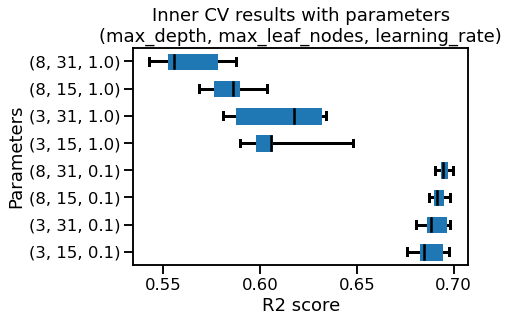

In [89]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
inner_cv_results.plot.box(vert=False, color=color)
plt.xlabel("R2 score")
plt.ylabel("Parameters")
_ = plt.title("Inner CV results with parameters\n"
              "(max_depth, max_leaf_nodes, learning_rate)")

We see that the first 4 ranked set of parameters are very close. We could select any of these 4 combinations. It coincides with the results we observe when inspecting the best parameters of the outer CV.